In [1]:
from PIL import Image
import numpy as np
import os
import re
from utils import process_one_image, load_data, maybe_npy

Using Theano backend.


# we take all the images in data folders, process them and save them into npy format for future training

# load processed image data into dataset

In [2]:
n_block = 2
image_width, image_height  = 128, 128
color_channel = 3
data_folders = ['data/fail', 'data/snp', 'data/insertion', 
                'data/deletion','data/complex','data/uncertain']

dataset = maybe_npy(data_folders, n_block, image_width, image_height, True)

npying data/fail.npy.
 x 0 sample.2.114737231.png
npying data/snp.npy.
 x 0 sample.1.144857493.png
npying data/insertion.npy.
 x 0 sample.1.245134187.png
npying data/deletion.npy.
 x 0 sample.10.17715298.png
npying data/complex.npy.
 x 0 CG0003-6741_Illumina.bam,CG0003-6253_Illumina.bam,CG0003-6262_Illumina.bam.20.39869114.png
npying data/uncertain.npy.
 x 0 COL-CHUNG_FPPH133-01_PAH_0165706180.realign.bam,COL-CHUNG_FPPH133-03_PAH_0165706253.realign.bam,COL-CHUNG_FPPH133-02_PAH_0165706266.realign.bam,20.62326555.62326595.png


In [3]:
all_image_names = []
for folder in data_folders:
    image_files = os.listdir(folder)
    all_image_names.extend(image_files)
all_image_names = np.array(all_image_names)
print len(all_image_names)
print dataset

20
['data/fail.npy', 'data/snp.npy', 'data/insertion.npy', 'data/deletion.npy', 'data/complex.npy', 'data/uncertain.npy']


# save data into npy format

In [5]:
name_to_label = {'fail.npy': 0, 'snp.npy':1, 'insertion.npy':2,'deletion.npy':3,
                 'complex.npy':4,'uncertain.npy':5, }

label_to_name = {0:'fail', 1:'snp', 2:'insertion', 3:'deletion', 4:'complex', 5:'uncertain'}

total_n = len(all_image_names)
train = np.ndarray(shape=(total_n, color_channel, image_width, image_height),
                         dtype=np.uint8)
label = np.ndarray((total_n,),dtype="uint8")

# combine npy 
start = 0
for data_name in dataset:
    print data_name
    data = np.load(data_name)
    data = np.array(data, dtype=np.uint8)
    end = data.shape[0]
    data_label = np.repeat(name_to_label[data_name.split('/')[-1]], end)
    train[start:start+end,:,:,:] = data
    label[start:start+end] = data_label
    start += end

# shuffle 
index = [i for i in range(total_n)]
np.random.shuffle(index)
train = train[index]
label = label[index]
all_image_names = all_image_names[index]
print(train.shape[0], ' samples')
print train.shape
print label.shape
np.save('data/train.npy', train)
np.save('data/label.npy', label)
np.save('data/name.npy', all_image_names)

data/fail.npy
data/snp.npy
data/insertion.npy
data/deletion.npy
data/complex.npy
data/uncertain.npy
(20, ' samples')
(20, 3, 128, 128)
(20,)


# view a random sample

uncertain
sample.19.49984528.png


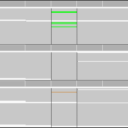

In [9]:
X = train
X = X.transpose((0, 2, 3, 1))
index = 7
img = Image.fromarray(X[index],'RGB')
print label_to_name[label[index]]
print all_image_names[index]
img